In [1]:
from src.models.approximator import *
from src.models.utils import *
from src.systems.system import *
from src.systems.utils import *
# the imports above only work when this notebook file is directly placed in mlicms2425ex5-groupg
from pathlib import Path

import numpy as np
from numpy.linalg import eigvals
import matplotlib.pyplot as plt

Part 1, get the estimated vector field from original data

In [5]:
data_file_path = Path("data/vector_field_linear.txt")
x0, x1 = load_vectorfield(data_file_path)
linear_model = TrainableDynamicalSystem(approximator=LinearApproximator).fit(x0=x0, x1=x1, delta_t=0.1)
A = linear_model.weights
eigenvalues_of_A = eigvals(A)
print(f"A is \n{np.round(A, 3)} \nthe eigenvalues of A are {np.round(eigenvalues_of_A, 3)}")

A is 
[[-0.494 -0.464]
 [ 0.232 -0.957]] 
the eigenvalues of A are [-0.725+0.232j -0.725-0.232j]


Part 2, compute mse between predicted x1 values and the real x1 values

In [3]:
x1_pred = linear_model.batch_simulate(states=x0, t_max=0.1)
mse_error = compute_mse(x1, x1_pred)
print(f"mse error of x1 and x1_pred is {mse_error}")

mse error of x1 and x1_pred is 9.957557291216244e-06


Part 3, visualize the trajectory as well as the phase portrait

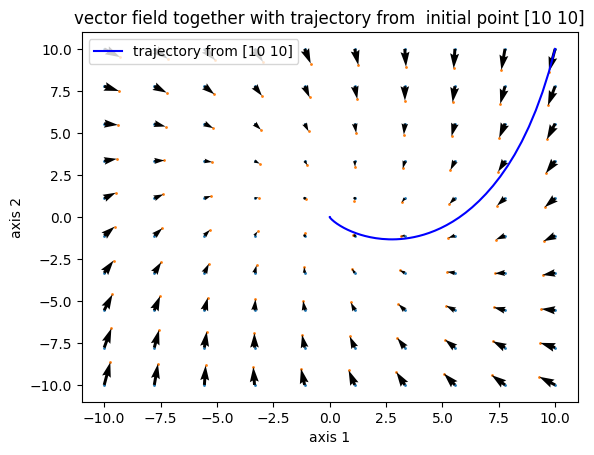

In [4]:
# compute the trajectory starting from (10,10)
initial_point = np.array([10,10])
t_max = 100
delta_t = 0.1
n_evals = int(t_max/delta_t)
traj = linear_model.simulate(state = initial_point, t_max=t_max, n_evals=n_evals)

# set the grid boundary and define the grid points where we plot the tangent vectors
grid_bounds = [[-10,10], [-10,10]]
n_grid_points_abscissa, n_grid_points_ordinate = 10, 10   # number of grid points on abscissa and ordinate

grid_points_abscissa = np.linspace(grid_bounds[0][0], grid_bounds[0][1], n_grid_points_abscissa)
grid_points_ordinate = np.linspace(grid_bounds[1][0], grid_bounds[1][1], n_grid_points_abscissa)
points_abscissa_values, points_ordinate_values = np.meshgrid(grid_points_abscissa, grid_points_ordinate)
grid_points = np.stack((points_abscissa_values,points_ordinate_values), axis=2).reshape(-1,2)

grid_points_after_one_step = linear_model.batch_simulate(states=grid_points, t_max=delta_t)  # where the grid points land after delta_t

# use the function defined in src\systems\utils.py to plot the vector field
fig, ax = plt.subplots()
plot_vector_field(ax=ax, x0=grid_points, x1=grid_points_after_one_step, x_label="axis 1", y_label="axis 2")

# plot the trajectory
ax.plot(traj[:, 0], traj[:, 1], color="blue", label=f"trajectory from {initial_point}")
ax.set_title(f"vector field together with trajectory from  initial point {initial_point}")
ax.legend(loc="upper left")
plt.show()